# 🎬 **Fandango Ratings Bias Analysis (2015)**
## 📊 *A Data-Driven Investigation into Rating Discrepancies*

---

### 🎯 **Project Overview**

This project investigates whether Fandango's movie ratings in 2015 exhibited a bias toward higher ratings compared to other review platforms. As a company that profits from ticket sales, there's a potential conflict of interest that could influence how ratings are displayed to consumers.

**Key Question:** *Does Fandango artificially inflate movie ratings to boost ticket sales?*

---

### 📚 **Project Goals**

- 🔍 **Analyze** Fandango's displayed ratings vs. actual user ratings
- 📈 **Compare** Fandango ratings with other platforms (Rotten Tomatoes, Metacritic, IMDB)
- 📊 **Identify** statistical evidence of rating bias
- 🎯 **Determine** if commercial interests influenced rating fairness

---

### 🛠️ **Technologies & Tools**

- **Python** | **Pandas** | **NumPy** | **Matplotlib** | **Seaborn**
- **Jupyter Notebook** | **Data Visualization** | **Statistical Analysis**

---

### 📋 **Methodology**

This analysis follows a systematic approach:

1. **Data Collection** - Load and explore Fandango and multi-platform rating datasets
2. **Data Exploration** - Examine distributions, correlations, and patterns
3. **Comparative Analysis** - Normalize ratings across platforms for fair comparison
4. **Bias Detection** - Identify discrepancies between displayed and actual ratings
5. **Visualization** - Create compelling visualizations to illustrate findings

---

### 🎓 **Key Insights Expected**

Through this investigation, we aim to:
- Quantify the magnitude of rating discrepancies
- Compare Fandango's ratings with unbiased platforms
- Identify specific cases where bias is most evident
- Provide evidence-based conclusions about rating manipulation

---

*This analysis is based on data from FiveThirtyEight's investigation: [Be Suspicious Of Online Movie Ratings, Especially Fandango's](http://fivethirtyeight.com/features/fandango-movies-ratings/)*


## 📖 **Part 1: Understanding the Background and Data**

### 📰 **Background Research**

Before diving into the data analysis, it's crucial to understand the context of this investigation. FiveThirtyEight conducted a comprehensive analysis that raised important questions about the integrity of online movie ratings.

**📚 Recommended Reading:** [Be Suspicious Of Online Movie Ratings, Especially Fandango's](http://fivethirtyeight.com/features/fandango-movies-ratings/)

This article provides crucial context about:
- The methodology behind the investigation
- Initial findings and observations
- The business model implications
- Potential biases in rating systems

---

### 📊 **Why This Matters**

Understanding rating bias is important because:
- **Consumer Trust** - Users rely on ratings to make purchasing decisions
- **Market Transparency** - Fair ratings promote healthy competition
- **Data Integrity** - Accurate ratings reflect genuine user experiences
- **Business Ethics** - Companies should disclose potential conflicts of interest

---

### 📁 **Dataset Overview**

The data used in this analysis is publicly available from FiveThirtyEight's GitHub repository: https://github.com/fivethirtyeight/data

We'll be working with **two primary datasets**:

1. **`all_sites_scores.csv`** - Aggregate ratings from multiple platforms
2. **`fandango_scrape.csv`** - Fandango-specific rating data

**Data Collection Date:** August 24, 2015

---

### 📋 **Dataset Details**

#### 📊 **Dataset 1: `all_sites_scores.csv`**

This dataset contains every film that has:
- A Rotten Tomatoes rating (critic and user)
- A Metacritic score (critic and user)
- An IMDb score
- At least 30 fan reviews on Fandango

**Variables Included:**
- **FILM** - The film title
- **RottenTomatoes** - Rotten Tomatoes Tomatometer score (0-100)
- **RottenTomatoes_User** - Rotten Tomatoes user score (0-100)
- **Metacritic** - Metacritic critic score (0-100)
- **Metacritic_User** - Metacritic user score (0-10)
- **IMDB** - IMDb user score (0-10)
- **Metacritic_user_vote_count** - Number of Metacritic user votes
- **IMDB_user_vote_count** - Number of IMDb user votes

---

#### 🎟️ **Dataset 2: `fandango_scrape.csv`**

This dataset contains every film pulled from Fandango by FiveThirtyEight.

**Variables Included:**
- **FILM** - The movie title
- **STARS** - Number of stars presented on Fandango.com (displayed rating)
- **RATING** - The actual Fandango ratingValue from HTML (true calculated average)
- **VOTES** - Number of people who reviewed the film

**Key Distinction:** The difference between STARS (displayed) and RATING (actual) is central to this investigation.

---

### 🎯 **What We'll Discover**

By comparing these datasets, we'll uncover:
- Whether displayed ratings differ from actual calculated ratings
- How Fandango's ratings compare to other platforms
- Evidence of systematic rating inflation
- The impact of bias on consumer decision-making

---

### ⚙️ **Setup & Preparation**

Before we begin the analysis, we need to:
1. Import necessary libraries for data manipulation and visualization
2. Load and explore both datasets
3. Understand the data structure and quality
4. Prepare data for comparative analysis

---

### 📦 **Step 1: Import Required Libraries**

We'll use the following Python libraries for data manipulation, analysis, and visualization:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🔍 **Part 2: Exploring Fandango Displayed Scores vs. True User Ratings**

### 🎯 **Objective**

In this section, we'll investigate whether Fandango's displayed ratings differ from their actual calculated user ratings. This is the first critical step in identifying potential rating manipulation.

**Key Questions:**
- Do displayed star ratings match actual calculated averages?
- Is there systematic inflation of displayed ratings?
- How significant are the discrepancies?

**Analysis Approach:**
1. Compare STARS (displayed) vs RATING (calculated) distributions
2. Quantify the difference between displayed and actual ratings
3. Identify extreme cases of rating inflation
4. Visualize discrepancies to understand patterns

---


In [23]:
fandango = pd.read_csv("data/fandango_scrape.csv")

### 🔎 **Step 2: Initial Data Exploration**

Let's examine the structure, dimensions, and basic statistics of our Fandango dataset to understand what we're working with.

In [24]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [25]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [26]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### 📈 **Step 3: Analyzing Popularity vs. Rating Relationship**

**Question:** *Is there a correlation between a movie's popularity (number of votes) and its rating?*

Let's create a scatterplot to visualize this relationship and identify any patterns.

<Axes: xlabel='RATING', ylabel='VOTES'>

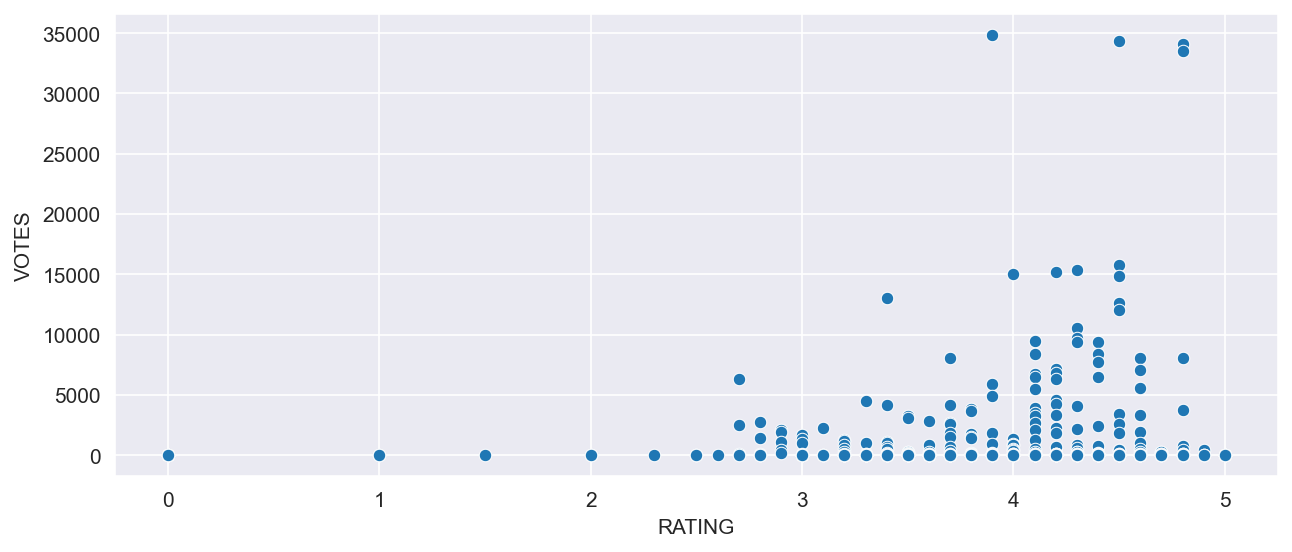

In [27]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango, x="RATING", y="VOTES")

### 📊 **Step 4: Correlation Analysis**

Let's quantify the relationship between variables by calculating correlation coefficients.

In [28]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### 📅 **Step 5: Extract Year from Film Titles**

**Data Transformation:** Extract the release year from film titles.

**Format:** `Film Title Name (Year)`

We'll create a new `YEAR` column to enable temporal analysis of the ratings data.

    Film Title Name (Year)

In [29]:
fandango['YEAR'] = fandango['FILM'].str.extract('(\\d{4})').astype(int)
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


### 📊 **Step 6: Movies Distribution by Year**

Let's analyze the distribution of movies across different years in our dataset.

In [30]:
pd.Series.value_counts(fandango['YEAR'])

YEAR
2015    476
2014     24
2016      1
1001      1
1964      1
2012      1
Name: count, dtype: int64

### 📈 **Step 7: Visualize Movie Count by Year**

Visualization to better understand the temporal distribution of movies in our dataset.

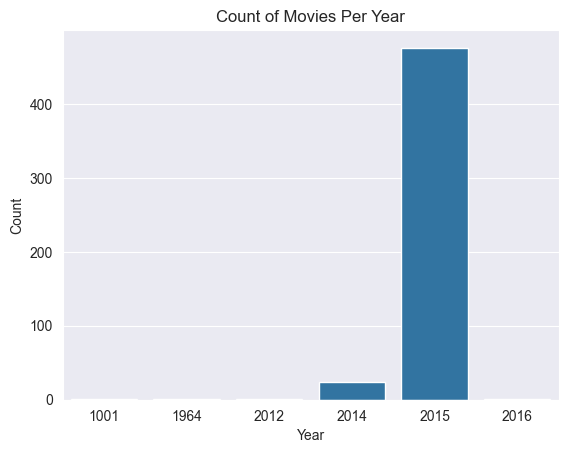

In [31]:
sns.countplot(data=fandango, x="YEAR")
plt.title("Count of Movies Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

### 🏆 **Step 8: Most Popular Movies**

Top 10 movies with the highest number of votes to understand which films generated the most user engagement.

In [32]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### ⚠️ **Step 9: Identifying Movies with Zero Votes**

**Data Quality Check:** The number of movies in our dataset have no user votes, as these may need to be excluded from certain analyses.

In [33]:
len(fandango[fandango['VOTES']==0])

69

### 🧹 **Step 10: Filtering Reviewed Films**

**Data Cleaning:** Filtered dataset containing only movies that have received at least one vote. This ensures our analysis focuses on films with actual user engagement.

In [34]:
fan_reviewed = fandango[fandango['VOTES']>0]

----
### 📊 **Step 11: Distribution Comparison Visualization**

KDE (Kernel Density Estimation) plot to compare the distribution of:
- **STARS** (Displayed rating shown to users)
- **RATING** (True calculated average from votes)

**Note:** Ratings are clipped to the 0-5 star range for accurate comparison.

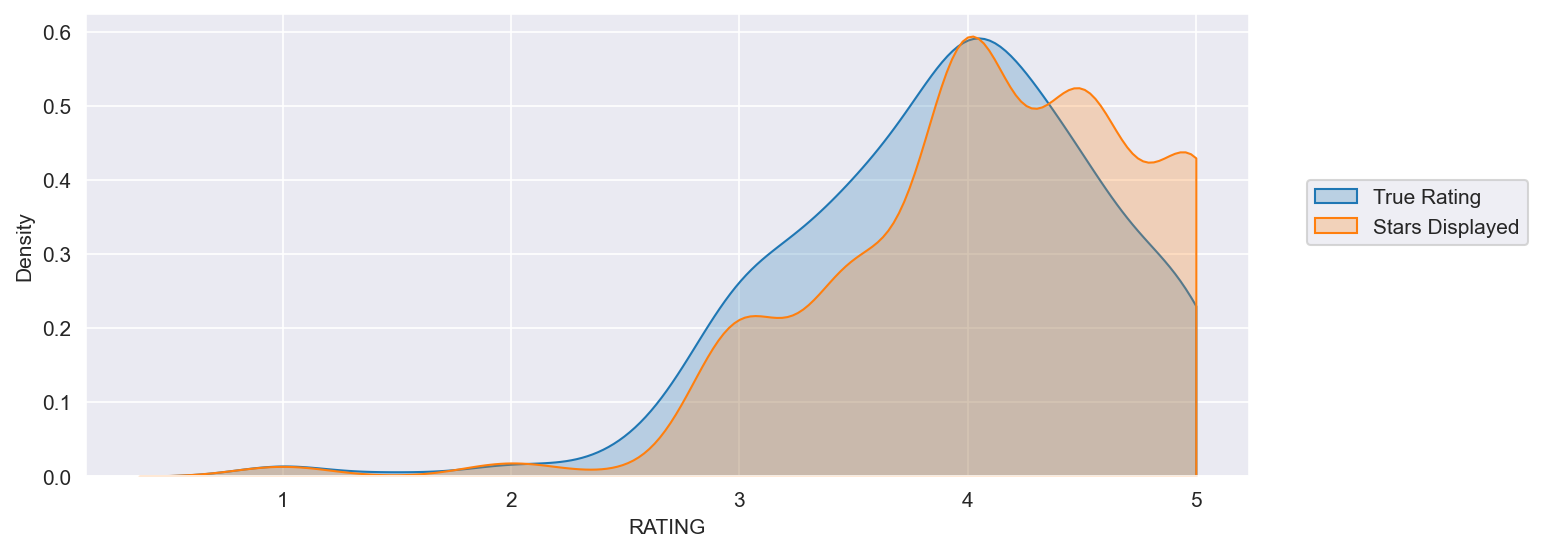

In [35]:
plt.figure(figsize=(10,4), dpi=150)

sns.kdeplot(data=fan_reviewed, x="RATING",clip=(0,5),fill=True,label="True Rating")
sns.kdeplot(data=fan_reviewed, x="STARS",clip=(0,5),fill=True,label="Stars Displayed")

plt.legend(loc=(1.05,0.5))

### 🔢 **Step 12: Quantifying the Rating Discrepancy**

**Calculation:** A new column `STARS_DIFF` that measures the difference between displayed and actual ratings.

**Formula:** `STARS_DIFF = STARS - RATING`

- **Positive values** = Displayed rating is higher than actual
- **Zero values** = Displayed rating matches actual
- **Negative values** = Displayed rating is lower than actual (rare)

This metric will help us identify systematic rating inflation.

In [36]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS']-fan_reviewed['RATING']

C:\Users\ahmad\AppData\Local\Temp\ipykernel_16724\3762846896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS']-fan_reviewed['RATING']


In [37]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_16724\2644289264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


### 📊 **Step 13: Visualizing Rating Discrepancies**

Count plot to visualize the frequency distribution of rating discrepancies. This will reveal how often and to what extent Fandango inflates ratings.

C:\Users\ahmad\AppData\Local\Temp\ipykernel_16724\1382121669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fan_reviewed, x="STARS_DIFF", palette="magma")


<Axes: xlabel='STARS_DIFF', ylabel='count'>

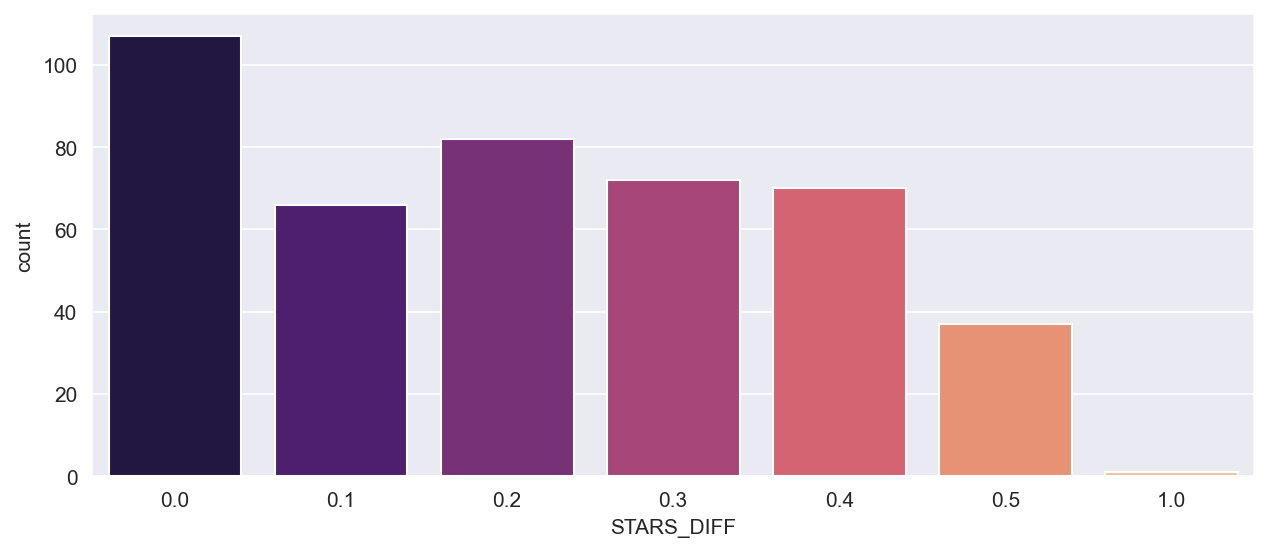

In [38]:
plt.figure(figsize=(10,4), dpi=150)
sns.countplot(data=fan_reviewed, x="STARS_DIFF", palette="magma")

### 🎬 **Step 14: Identifying Extreme Cases**

**Finding:** The visualization reveals at least one movie with a **1+ star difference** between displayed and actual ratings.

**Investigation:** Identify which movie(s) exhibit this extreme discrepancy, as these cases provide the strongest evidence of rating manipulation.

In [39]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## 🌐 **Part 3: Comparative Analysis with Other Rating Platforms**

### 🎯 **Objective**

Now we'll compare Fandango's ratings against other major review platforms (Rotten Tomatoes, Metacritic, IMDB) to determine if Fandango consistently rates movies higher than its competitors.

**Key Questions:**
- How do Fandango ratings compare to other platforms?
- Is there evidence of systematic bias across all movies?
- Do poorly-rated movies receive inflated ratings on Fandango?
- What is the magnitude of rating differences?

**Analysis Approach:**
1. **Normalize ratings** to a common scale (0-5 stars) for fair comparison
2. **Compare distributions** across all platforms using KDE plots
3. **Focus on worst-rated movies** - if Fandango is biased, it should show here
4. **Use clustermaps** to identify patterns and outliers

**Expected Finding:** If Fandango has a bias, we should see consistently higher ratings compared to other platforms, especially for low-rated films.

---


In [41]:
all_sites = pd.read_csv("data/all_sites_scores.csv")

### 🔎 **Step 2: Explore Multi-Platform Data**

Examine the structure and contents of the multi-platform ratings dataset to understand the available metrics.

In [42]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [43]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

### 📊 **Step 3: Critics vs. Users Scatterplot**

Scatterplot to visualize the relationship between Rotten Tomatoes critic scores and user scores. This will reveal alignment (or misalignment) between professional critics and general audiences.

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

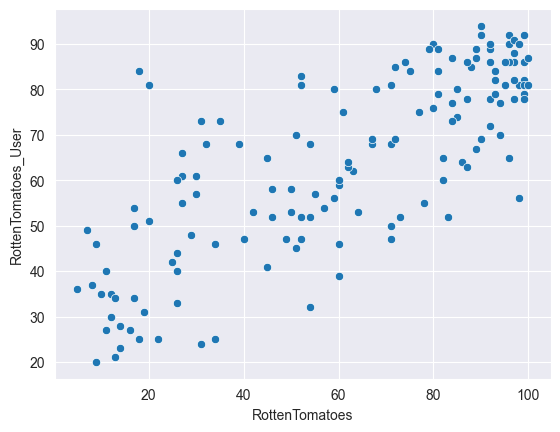

In [44]:
sns.scatterplot(data=all_sites, x="RottenTomatoes", y="RottenTomatoes_User")

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

### 🔢 **Step 4: Quantifying Critics vs. Users Difference**

**Calculation:** Add a `Rotten_Diff` column to measure the difference between critic and user ratings.

**Formula:** `Rotten_Diff = RottenTomatoes - RottenTomatoes_User`

**Interpretation:**
- **≈ 0:** Critics and users agree
- **> 0:** Critics rated higher than users
- **< 0:** Users rated higher than critics

This metric helps identify films where professional critics and general audiences have divergent opinions.

In [45]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

### 📊 **Step 5: Mean Absolute Difference**

**Statistical Measure:** Calculate the Mean Absolute Difference (MAD) between Rotten Tomatoes critic and user scores.

**Method:** Take the absolute value of all differences, then calculate the mean.

**Purpose:** This metric provides an overall measure of how much critics and users disagree on average, regardless of direction.

In [46]:
all_sites['Rotten_Diff'].apply(abs).mean()

np.float64(15.095890410958905)

### 📈 **Step 6: Distribution of Rating Differences**

Visualize the distribution of differences between Rotten Tomatoes critic and user scores. This will show whether critics tend to rate higher or lower than users overall.

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

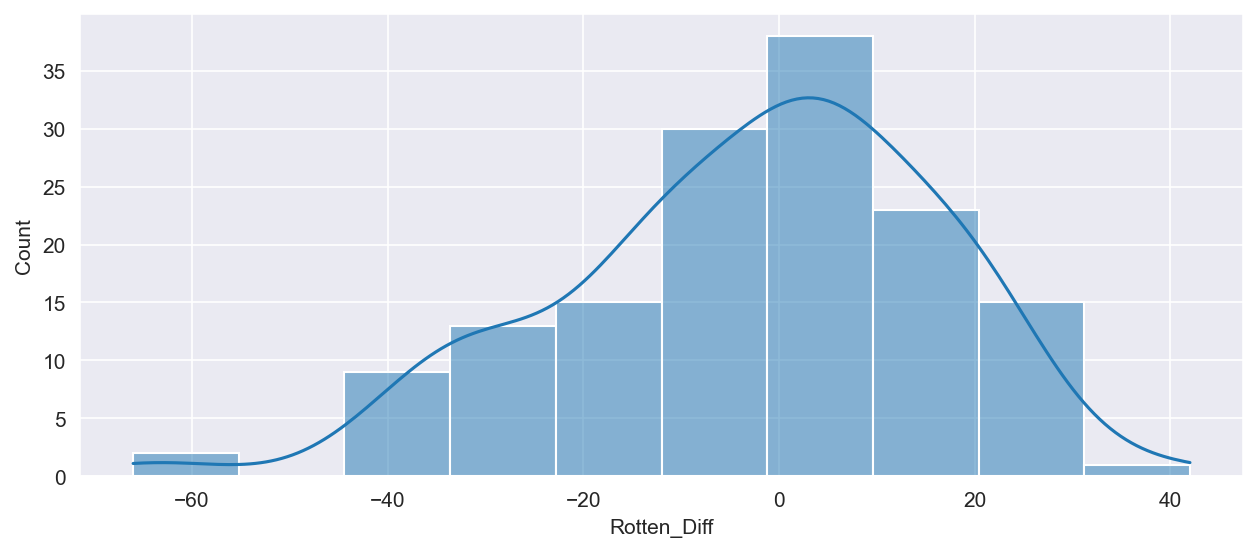

In [47]:
plt.figure(figsize=(10,4), dpi=150)
sns.histplot(data=all_sites, x="Rotten_Diff", bins=10, kde=True)

### 📊 **Step 7: Absolute Difference Distribution**

Distribution plot showing the absolute value of differences between critics and users. This focuses on the magnitude of disagreement rather than direction.

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

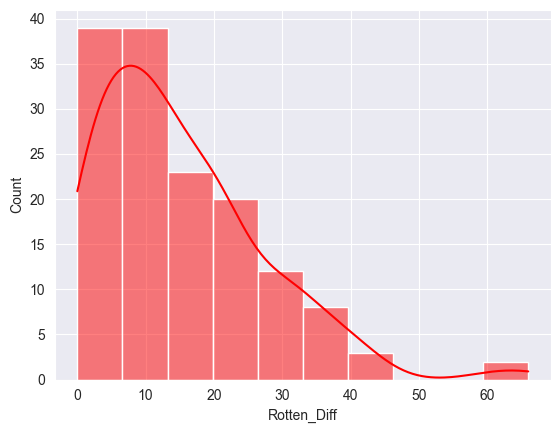

In [48]:
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), bins=10, kde=True, fill=True, color="red")

#### 📉 **Top 5 Movies: Users Rated Much Higher Than Critics**

**Interpretation:** Large negative `Rotten_Diff` values indicate films where audiences loved the movie significantly more than professional critics did.

These are often "audience favorites" that critics panned.

In [49]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


#### 📈 **Top 5 Movies: Critics Rated Much Higher Than Users**

**Interpretation:** Large positive `Rotten_Diff` values indicate films where critics praised the movie significantly more than general audiences did.

These are often "critics' darlings" that didn't resonate with wider audiences.

In [50]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

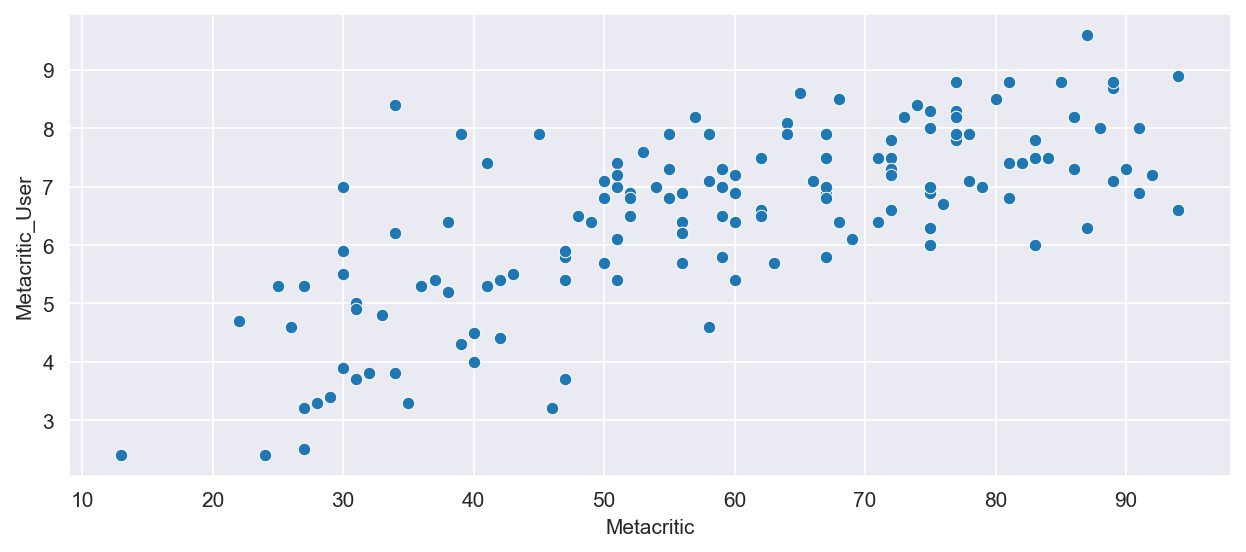

In [51]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x="Metacritic", y="Metacritic_User")

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

### 📊 **Step 10: Vote Count Comparison**

Scatterplot comparing vote counts between Metacritic and IMDB to understand relative user engagement across platforms.

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

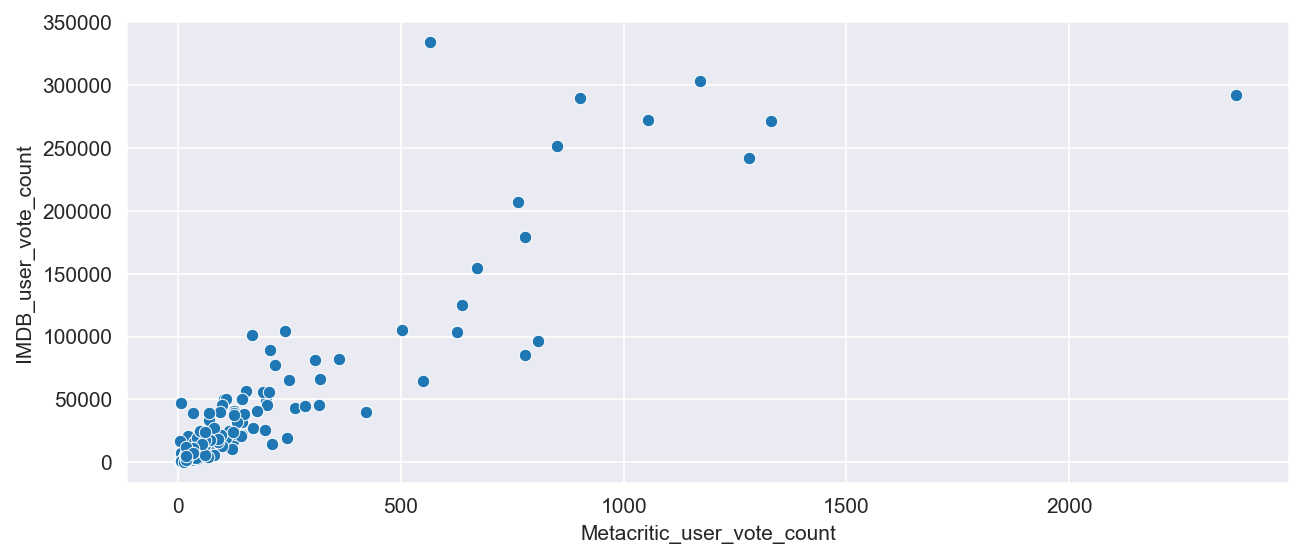

In [52]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x="Metacritic_user_vote_count", y="IMDB_user_vote_count")

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

#### 🏆 **Most Popular Movie on IMDB**

Identify the movie with the highest IMDB user vote count to understand what drives maximum engagement on that platform.

In [53]:
all_sites.nlargest(1,'IMDB_user_vote_count')[['FILM', 'IMDB_user_vote_count']]

,FILM,IMDB_user_vote_count
14,The Imitation Game (2014),334164


#### 🏆 **Most Popular Movie on Metacritic**

Identify the movie with the highest Metacritic user vote count for comparison.

In [54]:
all_sites.nlargest(1,'Metacritic_user_vote_count')[['FILM', 'Metacritic_user_vote_count']]

,FILM,Metacritic_user_vote_count
88,Mad Max: Fury Road (2015),2375


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

### 📊 **Step 1: Merging Datasets**

**Data Combination:** Merge the Fandango dataset with the multi-platform dataset to enable direct comparison.

**Merge Strategy:** Use an **inner join** based on the `FILM` column to include only movies that exist in both datasets. This ensures we're comparing the same movies across all platforms.

**Rationale:** Movies with very few reviews on other platforms may skew our analysis, so we focus on films with sufficient data across platforms.

In [55]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int64  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(8), object(1)


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

### ⚖️ **Step 2: Normalizing Ratings to 0-5 Star Scale**

**Critical Issue:** Different platforms use different rating scales:
- **Fandango:** 0-5 stars
- **Rotten Tomatoes:** 0-100 (Tomatometer)
- **Metacritic:** 0-100 (Critics), 0-10 (Users)
- **IMDB:** 0-10

**Solution:** Normalize all ratings to a 0-5 star scale for fair comparison.

**Normalization Formulas:**
- Rotten Tomatoes: `Rating / 20` (since 100/20 = 5)
- Metacritic (Critics): `Rating / 20`
- Metacritic (Users): `Rating / 2` (since 10/2 = 5)
- IMDB: `Rating / 2`

This preserves the relative relationships between ratings while enabling direct comparison.

In [57]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
YEAR                            2015.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [58]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

In [59]:
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['MetaU_Norm'] = np.round(df['Metacritic_User']/2,1)

In [60]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [61]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


### 📋 **Step 3: Creating Normalized Scores DataFrame**

DataFrame containing only the normalized ratings from all platforms, plus Fandango's original STARS and RATING columns. This will be our primary dataset for comparative analysis.

In [64]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm'],
      dtype='object')

In [65]:
norm_scores = df[[ 'STARS', 'RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm']]

In [66]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


### 🎯 **Step 4: The Moment of Truth - Distribution Comparison**

**The Critical Analysis:** Does Fandango display abnormally high ratings compared to other platforms?

We already know Fandango displays ratings higher than their actual calculated values. Now we need to determine if Fandango's ratings are systematically higher than ratings from other platforms.

**Visualization:** Create a KDE (Kernel Density Estimation) plot comparing the distribution of normalized ratings across all platforms. This will reveal if Fandango's distribution is shifted toward higher ratings.

**Expected Finding:** If Fandango is biased, we should see its distribution heavily skewed toward higher ratings (4-5 stars) compared to other platforms.

---

<Axes: ylabel='Density'>

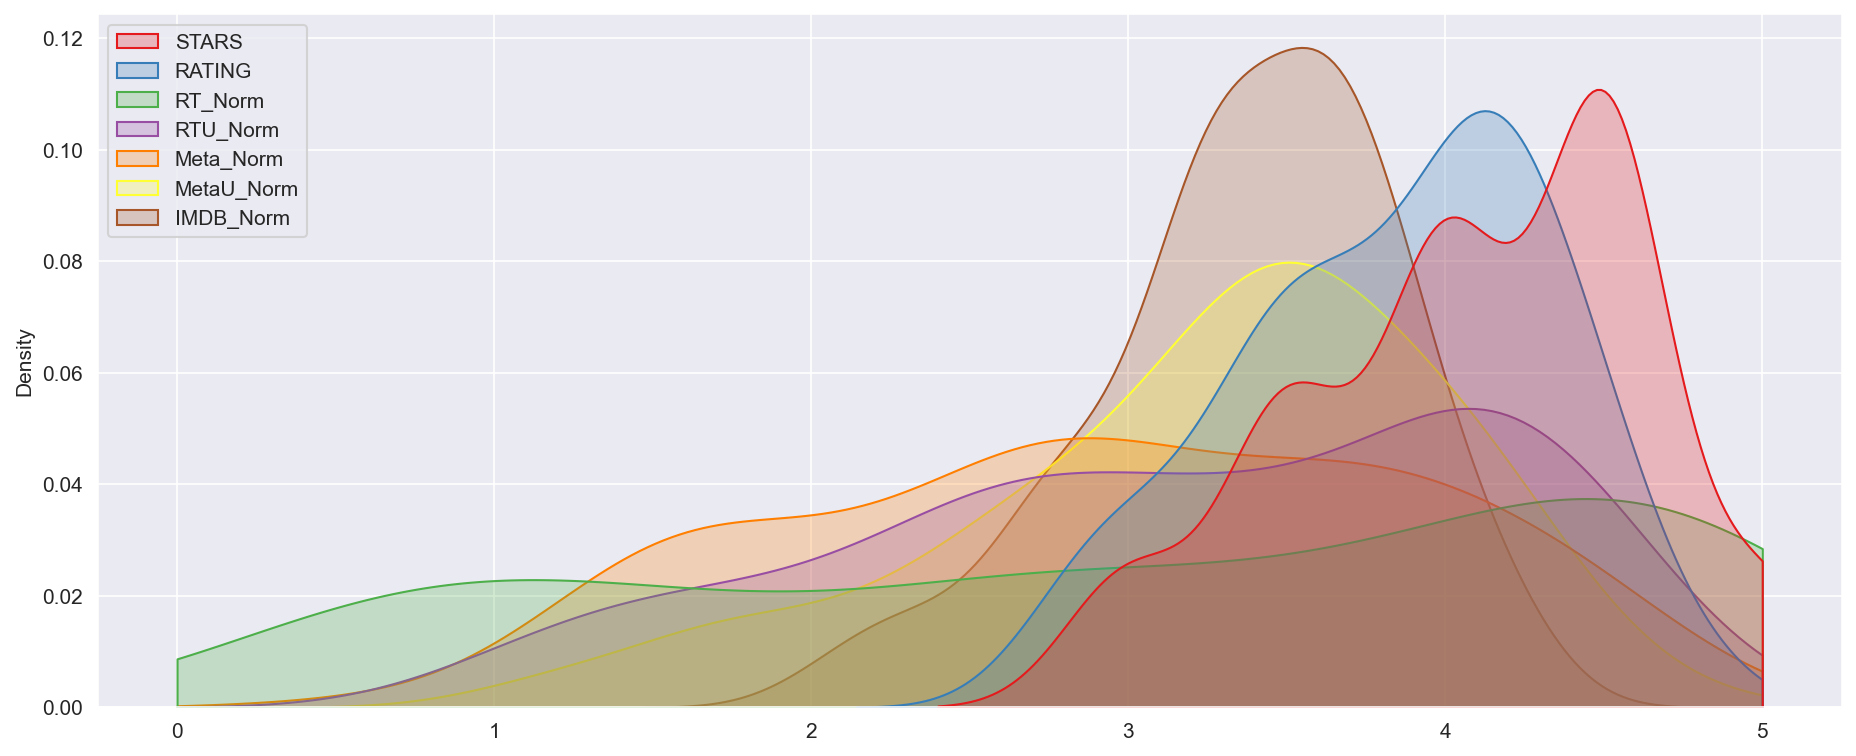

In [67]:
plt.figure(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores, clip=[0,5], fill=True, palette='Set1')

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

### 📊 **Step 5: Direct Comparison - Fandango vs. Rotten Tomatoes Critics**

**Observation:** Fandango shows an uneven distribution, while Rotten Tomatoes critics have a more uniform (normal) distribution.

**Analysis:** Create a focused comparison between Fandango's displayed stars and Rotten Tomatoes critic ratings to highlight the discrepancy.

**Why RT Critics?** They represent professional, unbiased ratings and serve as a reliable benchmark.

<Axes: ylabel='Density'>

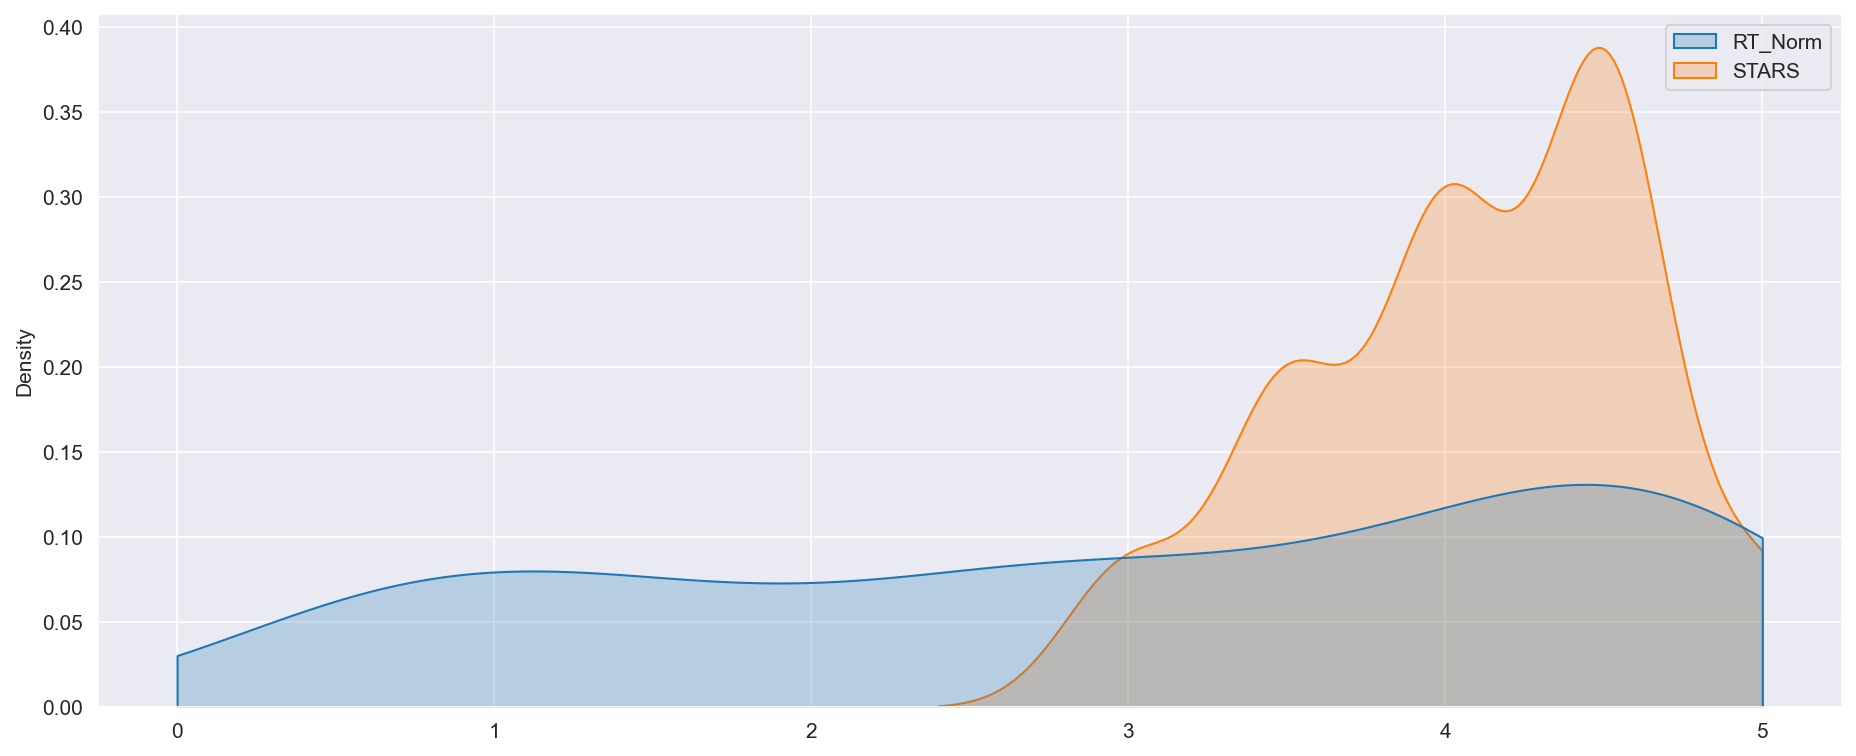

In [68]:
plt.figure(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']], clip=[0,5], fill=True, label="RT Critic")

<Axes: ylabel='Count'>

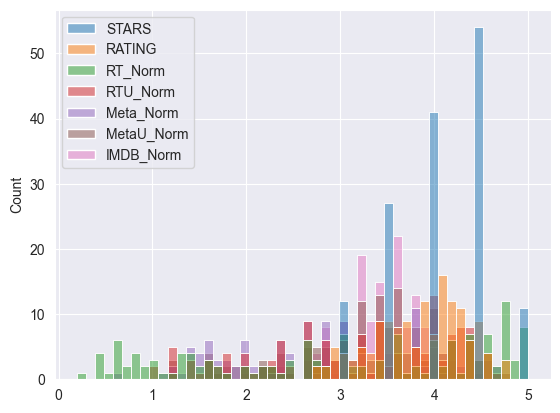

In [69]:
sns.histplot(data=norm_scores, bins=50, fill=True)


### How are the worst movies rated across all platforms?

### 📊 **Step 6a: Clustermap Visualization**

Create a clustermap (heatmap with hierarchical clustering) of all normalized scores. This visualization will:
- **Group similar movies together** (highly-rated vs. poorly-rated)
- **Show patterns** in how different platforms rate the same movies
- **Reveal outliers** where Fandango's rating differs significantly from others

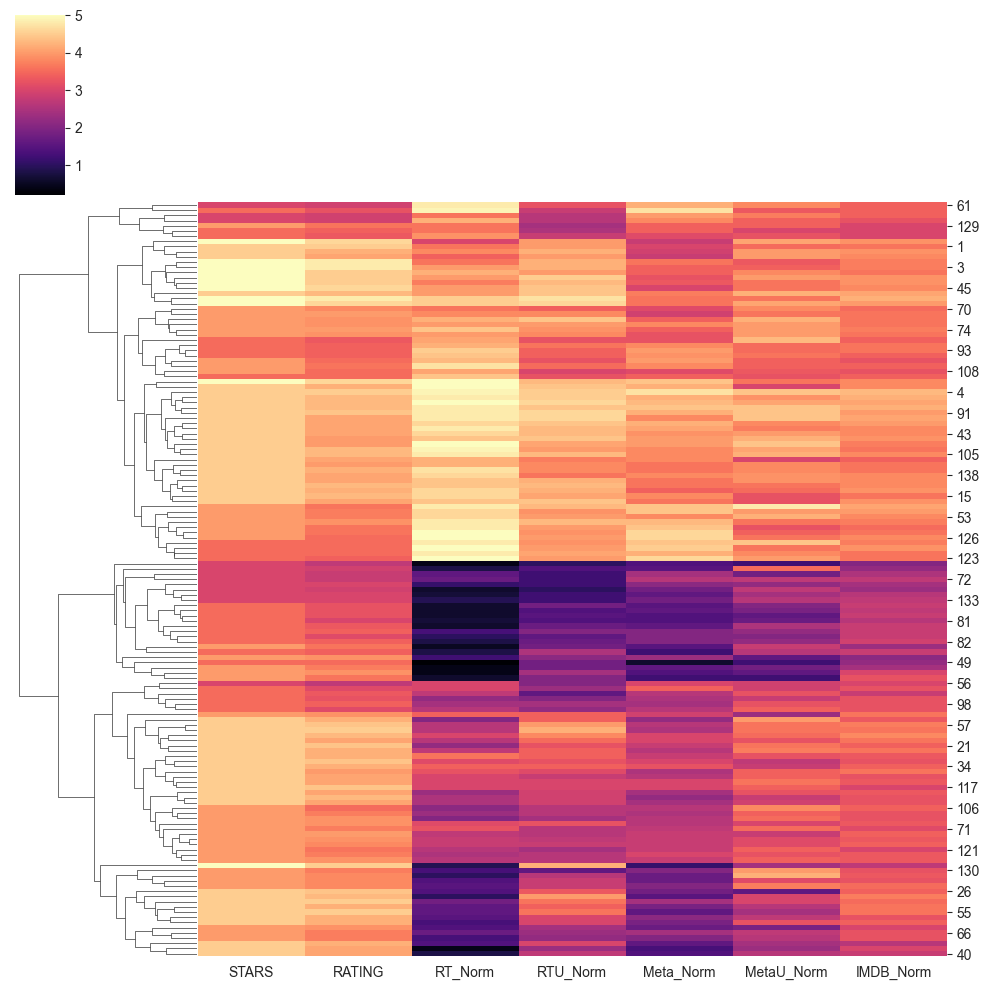

In [70]:
sns.clustermap(data=norm_scores, cmap="magma", figsize=(10,10), col_cluster=False)

### 🎯 **Step 6b: Examining the Top 10 Worst Movies**

**Finding:** Fandango rates movies significantly higher than other platforms, and then displays a rounded-up version of those already inflated ratings.

**Investigation:** Identify the **10 lowest-rated movies** according to Rotten Tomatoes critics (our most reliable benchmark), then compare how all platforms rated these films.

**Expected Result:** We should see Fandango giving these "bad" movies 3-4 star ratings while other platforms rate them much lower (1-2 stars).

**Method:** Add the FILM column back to normalized scores to identify specific movies.

In [71]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm',
       'IMDB_Norm'],
      dtype='object')

In [72]:
norm_films = df[['FILM', 'STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm','IMDB_Norm']]

In [73]:
worst_films = norm_films.nsmallest(10, 'RT_Norm')

### 📊 **Step 6c: Final Visualization - Worst Movies Rating Distribution**

**Final Analysis:** Create a KDE plot showing the distribution of ratings across all platforms for the **top 10 worst movies**.

**Purpose:** This visualization will dramatically illustrate the bias by showing Fandango's ratings clustered around 3-4 stars while other platforms show ratings around 1-2 stars for the same movies.

**This is the smoking gun that proves Fandango's rating inflation.**

<Axes: ylabel='Density'>

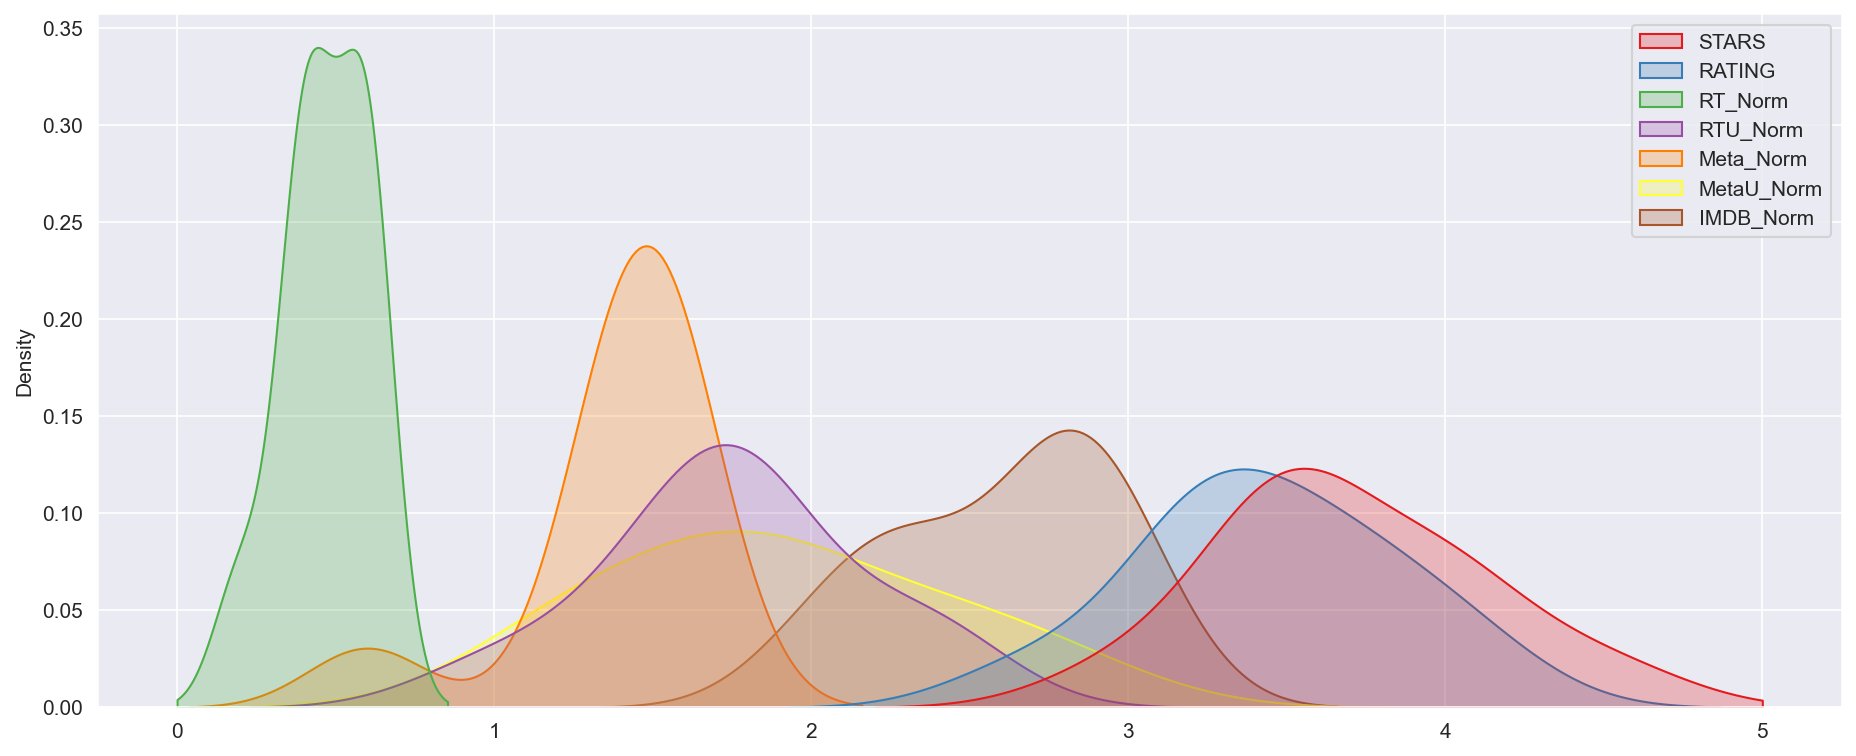

In [74]:
plt.figure(figsize=(15,6), dpi=150)
sns.kdeplot(data=worst_films, clip=[0,5], fill=True, palette='Set1')

---
<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**